In [1]:
# 导入类库
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [153]:
d33=pd.read_csv('E:/yadian.csv')  #读取数据集
x=d33[['平面聚集度y','聚集高度y','平面聚集数y','平面聚集度x','平面聚集数x','界面垂直因子','界面平行因子','优势路径','最短路径','通道因子y','通道因子z','通道因子x','优势分布','受力因子','聚集数','最大聚集度','平均聚集度','颗粒平均高度','竖向因子','取向因子','高度与面积之比y','高度与面积之比x','周长y','周长x','圆度y','圆度x','上下界面面积与体积之比','侧面界面面积与体积之比','颗粒平均表面积','颗粒平均比表面积','球度']]
x1=d33[['取向因子y','取向因子x','PZT体积分数']]
x2=d33[['聚集高度x','聚集高度y','PZT体积分数']]
x3=d33[['颗粒平均高度','PZT体积分数']]
x4=d33[['通道因子z','界面平行因子','颗粒平均表面积','球度','最大聚集度']]
y=d33['d33']
x1=StandardScaler().fit_transform(x1)
x2=StandardScaler().fit_transform(x2)
x3=StandardScaler().fit_transform(x3)

In [154]:
pca = PCA(n_components=3)
reduced_x1 = pca.fit_transform(x1)#得到了pca降到2维的数据
reduced_x2 = pca.fit_transform(x2)#得到了pca降到2维的数据
reduced_x4 = pca.fit_transform(x4)#得到了pca降到2维的数据
X=np.concatenate((reduced_x1,x4),axis=1)
#name=['取向1','取向2','通道因子z','界面平行因子','颗粒平均表面积','球度','最大聚集度']
#PCA1=pd.DataFrame(columns=name,data=X)
#PCA1.to_csv('E:/PCA1.csv',encoding='utf-8-sig')  #存储降维数据
print(X.shape)
print(X)
x_train,x_test,y_train,y_test=train_test_split(reduced_x4,y,test_size=0.2,random_state=201)

(499, 8)
[[ 2.18087393e+00  2.16101825e+00  3.45427279e-02 ...  6.58657143e+03
   2.72474928e-01  5.25770000e+04]
 [-1.16926167e+00  2.09722122e+00  3.90478435e-01 ...  5.07055556e+03
   2.46623318e-01  5.05220000e+04]
 [ 2.14574067e+00  2.02389847e+00  8.15451783e-03 ...  4.91961111e+03
   3.15806765e-01  4.91280000e+04]
 ...
 [-1.21743629e+00 -1.69477300e+00  4.68718508e-01 ...  5.13380952e+01
   3.91373653e-01  4.00000000e+01]
 [ 2.82771719e+00 -1.72382657e+00 -2.10303235e-01 ...  2.74820513e+01
   4.98482504e-01  3.20000000e+01]
 [-7.78874707e-01 -1.70344529e+00  3.18222642e-02 ...  4.45721154e+01
   4.59804607e-01  3.20000000e+01]]


In [155]:
#GBRT
from sklearn.ensemble import GradientBoostingRegressor
#params = {'n_estimators': 3000, 'max_depth': 2, 'min_samples_split': 2, 'learning_rate': 0.005, 'loss': 'ls'}
GBRT =  GradientBoostingRegressor()
GBRT.fit(x_train, y_train)
GBRT_y_predict = GBRT.predict(x_test)
name=['GBRT']
#test3=pd.DataFrame(columns=name,data=GBRT_y_predict)
#test3.to_csv('E:/y_testGBRT2.csv',encoding='utf-8-sig')

In [156]:
r2_GBRT, MSE_GBRT, MAE_GBRT = r2_score(y_test, GBRT_y_predict),\
                           mean_squared_error(y_test, GBRT_y_predict),\
                           mean_absolute_error(y_test, GBRT_y_predict)

In [157]:
print(r2_GBRT)

0.8335066067486796


In [158]:
#SVR
from sklearn.svm import SVR
SVR = make_pipeline(StandardScaler(), SVR(kernel="rbf",gamma=0.26826957952797276,C=100))
SVR.fit(x_train, y_train)
SVR_y_predict = SVR.predict(x_test)

In [159]:
r2_SVR, MSE_SVR, MAE_SVR = r2_score(y_test, SVR_y_predict), \
                                          mean_squared_error(y_test, SVR_y_predict), \
                                          mean_absolute_error(y_test, SVR_y_predict)

In [160]:
print(r2_SVR)

0.8487642763337855


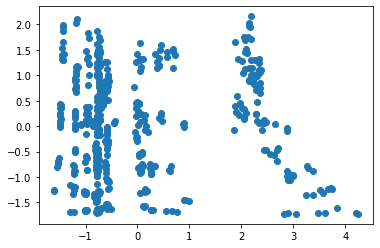

In [161]:
i=reduced_x1[:,0]
j=reduced_x1[:,1]
plt.scatter(i,j)